# Phishing Websight Using Machine Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score,KFold
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc, roc_auc_score,roc_curve
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Phishing Website Dataset.csv")
data.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
df = data.copy()

In [5]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [7]:
df.duplicated().sum()

np.int64(5206)

In [8]:
df["Result"].value_counts()

Result
 1    6157
-1    4898
Name: count, dtype: int64

In [9]:
df[-(df.duplicated())]["Result"].value_counts()

Result
-1    3019
 1    2830
Name: count, dtype: int64

* -(df.duplicated()):

    * The negation operator (-) converts True to False and vice versa, effectively selecting only rows that are not duplicates.


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            5849 non-null   int64
 1   URL_Length                   5849 non-null   int64
 2   Shortining_Service           5849 non-null   int64
 3   having_At_Symbol             5849 non-null   int64
 4   double_slash_redirecting     5849 non-null   int64
 5   Prefix_Suffix                5849 non-null   int64
 6   having_Sub_Domain            5849 non-null   int64
 7   SSLfinal_State               5849 non-null   int64
 8   Domain_registeration_length  5849 non-null   int64
 9   Favicon                      5849 non-null   int64
 10  port                         5849 non-null   int64
 11  HTTPS_token                  5849 non-null   int64
 12  Request_URL                  5849 non-null   int64
 13  URL_of_Anchor                5849 non-null   int64
 

In [12]:
df.reset_index(drop=True,inplace=True)

* drop=True:

    * Prevents the old index from being added as a new column in the DataFrame.
    * If drop=False (default), the old index is retained as a new column.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5849 entries, 0 to 5848
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            5849 non-null   int64
 1   URL_Length                   5849 non-null   int64
 2   Shortining_Service           5849 non-null   int64
 3   having_At_Symbol             5849 non-null   int64
 4   double_slash_redirecting     5849 non-null   int64
 5   Prefix_Suffix                5849 non-null   int64
 6   having_Sub_Domain            5849 non-null   int64
 7   SSLfinal_State               5849 non-null   int64
 8   Domain_registeration_length  5849 non-null   int64
 9   Favicon                      5849 non-null   int64
 10  port                         5849 non-null   int64
 11  HTTPS_token                  5849 non-null   int64
 12  Request_URL                  5849 non-null   int64
 13  URL_of_Anchor                5849 non-null   int

In [14]:
df.corr()["Result"]

having_IP_Address              0.104952
URL_Length                     0.058228
Shortining_Service            -0.076166
having_At_Symbol               0.034757
double_slash_redirecting      -0.036693
Prefix_Suffix                  0.381134
having_Sub_Domain              0.296214
SSLfinal_State                 0.693228
Domain_registeration_length   -0.218623
Favicon                       -0.025457
port                           0.014201
HTTPS_token                   -0.051412
Request_URL                    0.237778
URL_of_Anchor                  0.679125
Links_in_tags                  0.243864
SFH                            0.281131
Submitting_to_email           -0.008014
Abnormal_URL                  -0.090043
Redirect                      -0.037462
on_mouseover                   0.012790
RightClick                     0.009286
popUpWidnow                   -0.022455
Iframe                        -0.011756
age_of_domain                  0.062800
DNSRecord                      0.033204


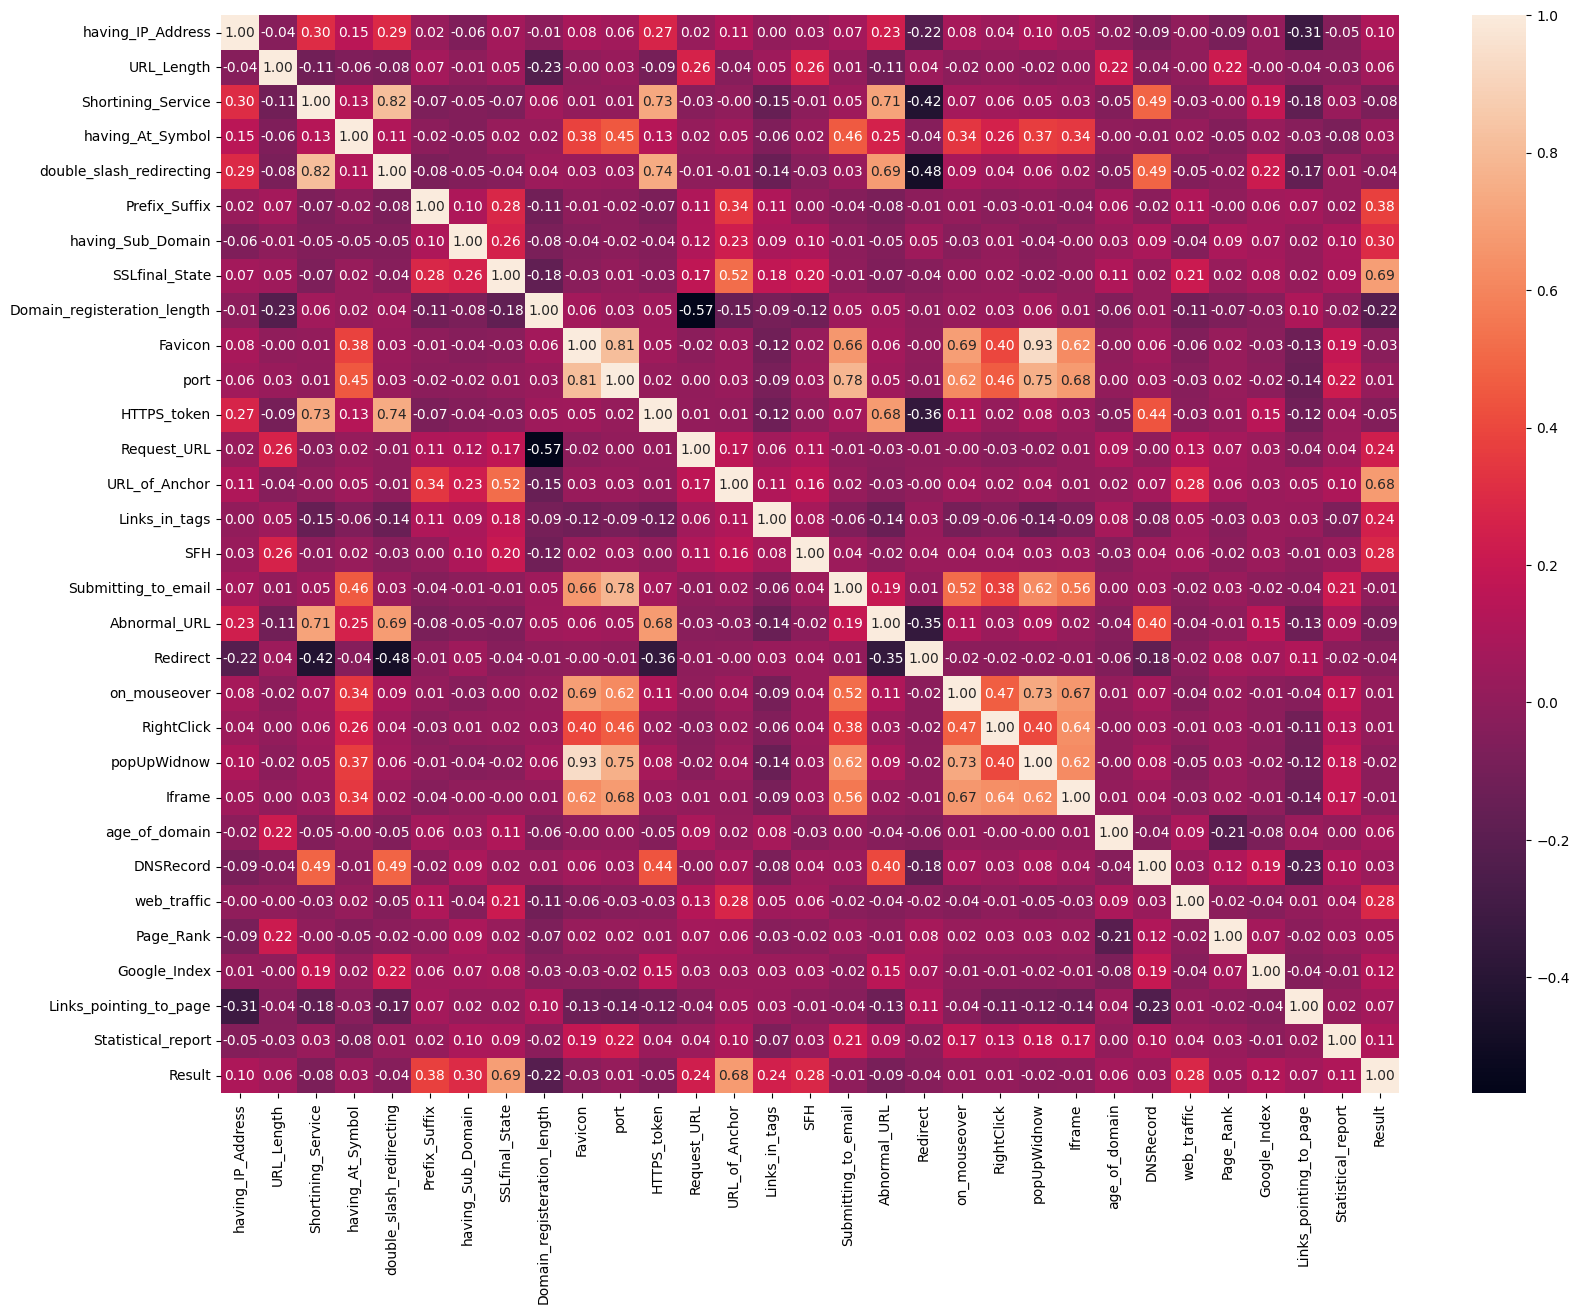

In [15]:
plt.figure(figsize=(19,14))
sns.heatmap(df.corr(),annot=True,fmt=".2f")
plt.show()

In [16]:
x = df.drop("Result",axis=1)
y = df["Result"]

In [17]:
x_tr, x_te, y_tr, y_te = train_test_split(x,y,train_size=0.75,random_state=33)

In [18]:
models = [DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
         LogisticRegression(),KNeighborsClassifier(),BernoulliNB()]

In [19]:
for i in models:
    m = i
    m.fit(x_tr,y_tr)
    tr_acc = m.score(x_tr,y_tr)
    prd = m.predict(x_te)
    te_acc = accuracy_score(y_te,prd)
    print(f"Model : {i}")
    print("Training Accuracy :",tr_acc)
    print("Testing Accuracy :",te_acc)

Model : DecisionTreeClassifier()
Training Accuracy : 0.9901960784313726
Testing Accuracy : 0.935064935064935
Model : RandomForestClassifier()
Training Accuracy : 0.9901960784313726
Testing Accuracy : 0.949419002050581
Model : AdaBoostClassifier()
Training Accuracy : 0.9384404924760602
Testing Accuracy : 0.9302802460697197
Model : LogisticRegression()
Training Accuracy : 0.9240766073871409
Testing Accuracy : 0.9138755980861244
Model : KNeighborsClassifier()
Training Accuracy : 0.9507523939808481
Testing Accuracy : 0.9070403280929596
Model : BernoulliNB()
Training Accuracy : 0.8985408116735066
Testing Accuracy : 0.8947368421052632


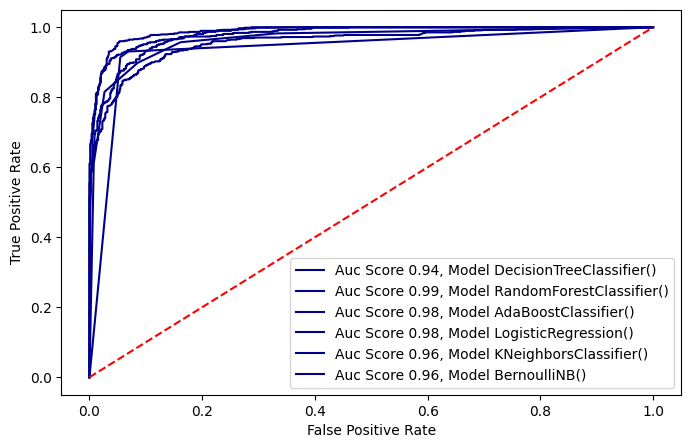

In [20]:
plt.figure(figsize=(8,5))
for i in models:
    m = i
    m.fit(x_tr,y_tr)
    tr_acc = m.score(x_tr,y_tr)
    prd_prob = m.predict_proba(x_te)[:,1]
    fpr, tpr, th = roc_curve(y_te,prd_prob)
    auc_score = auc(fpr, tpr)

   
    plt.plot(fpr, tpr, color="darkblue",label=f"Auc Score {np.round(auc_score,2)}, Model {i}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0,1],[0,1],color="red",ls="--")
plt.legend()
plt.show()

In [21]:
parameters = {
    "n_estimators":[50, 100, 150, 200],
    "criterion":["gini","entropy"],
    "max_depth":[10, 12, 14],
    "max_features":["sqrt","log2",20,24,28],
}


In [22]:
gscv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=parameters,n_jobs=-1,cv=5,
                   verbose=True,scoring="accuracy")

In [23]:
gscv.fit(x_tr, y_tr)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14],
                         'max_features': ['sqrt', 'log2', 20, 24, 28],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=True)

In [24]:
gscv.best_score_

np.float64(0.9512086918803229)

In [25]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'log2',
 'n_estimators': 150}

In [27]:
y_pr = gscv.best_estimator_.predict(x_te)

In [29]:
accuracy_score(y_te,y_pr)

0.9453178400546821

In [30]:
print(classification_report(y_te,y_pr))

              precision    recall  f1-score   support

          -1       0.96      0.93      0.95       786
           1       0.93      0.96      0.94       677

    accuracy                           0.95      1463
   macro avg       0.94      0.95      0.95      1463
weighted avg       0.95      0.95      0.95      1463



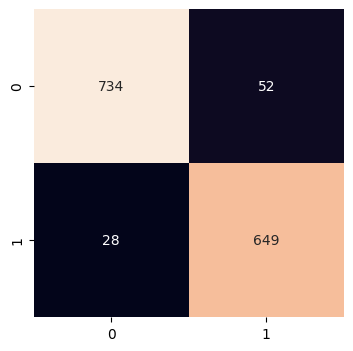

In [34]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(y_te,y_pr),annot=True,fmt="d",cbar=False)
plt.show()

In [37]:
import re

In [43]:
new_data = []

url = "http://125.98.3.123/fake.html"

find_ip = re.findall("\d+",url)

if len(find_ip)>=4:
    new_data.append(1)
else:
    new_data.append(-1)

if len(url) < 54:
    new_data.append(-1)
elif 54 < len(url) <75:
    new_data.append(0)
else:
    new_data.append(1)

if "tinuurl" in url or "bit.ly" in url:
    new_data.append(1)
else:
    new_data.append(-1)

In [44]:
new_data

[1, -1, -1]